# Activity: Build a K-means model 

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will help you expand your skillset in a widely applicable way.   

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Your will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

**Note:** Because this lab uses a real dataset, this notebook will first require basic EDA, data cleaning, and other manipulations to prepare the data for modeling. 

## **Step 1: Imports** 


Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

In [20]:
# IMPORT STATEMENTS

# Standard operational package imports
import numpy as np
import pandas as pd

##################################################
###  Important imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
##################################################


# (To create synthetic data)
from sklearn.datasets import make_blobs

# Visualization package import
import seaborn as sns

`Pandas` is used to load the penguins dataset, which is built into the `seaborn` library. The resulting `pandas` DataFrame is saved in a variable named `penguins`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [21]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Save the `pandas` DataFrame in variable `penguins`. 



penguins = pd.read_csv("penguins.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `load_dataset` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The function is from seaborn (`sns`). It should be passed in the dataset name `'penguins'` as a string. 

</details>

Now, review the first 10 rows of data.


In [22]:
# Review the first 10 rows.

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

By default, the method only returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

## **Step 2: Data exploration** 

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, determine how many different types of penguin species are in the dataset.

In [23]:
# Find the number of unique penguin species
num_species = penguins['species'].nunique()
print("Number of penguin species:", num_species)

# Optional: print the unique species names
print("Species types:", penguins['species'].unique())


Number of penguin species: 3
Species types: ['Adelie' 'Chinstrap' 'Gentoo']


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `unique()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `unique()` method on the column `'species'`.

</details>

In [24]:
# Count of each species type
species_counts = penguins['species'].value_counts()
print(species_counts)


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `value_counts()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` method on the column `'species'`.

</details>

**Question:** How many types of species are present in the dataset?

[Write your response here. Double-click (or enter) to edit.]

**Question:** Why is it helpful to determine the perfect number of clusters using K-means when you already know how many penguin species the dataset contains?

[Write your response here. Double-click (or enter) to edit.]

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data. 

In [25]:
# Check for missing values
missing_values = penguins.isnull().sum()
print(missing_values)


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `isnull` and `sum` methods. 

</details>

Now, drop the rows with missing values and save the resulting pandas DataFrame in a variable named `penguins_subset`.

In [26]:
# Drop rows with missing values and save to penguins_subset
penguins_subset = penguins.dropna()

# Display the first few rows to confirm
penguins_subset.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `dropna`. Note that an axis parameter passed in to this function should be set to 0 if you want to drop rows containing missing values or 1 if you want to drop columns containing missing values. Optionally, `reset_index` may also be used to avoid a SettingWithCopy warning later in the notebook. 
</details>

Next, check to make sure that `penguins_subset` does not contain any missing values.

In [27]:
# Check for missing values
missing_values = penguins_subset.isnull().sum()
print(missing_values)


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Now, review the first 10 rows of the subset.

In [28]:
# View first 10 rows.

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. The code below will make sure all values are ALL CAPS. 


In [29]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

K-means needs numeric columns for clustering. Convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm. 

In [30]:
from sklearn.preprocessing import LabelEncoder

# Ensure 'sex' values are in uppercase
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

# Convert 'sex' column to numeric
le = LabelEncoder()
penguins_subset['sex'] = le.fit_transform(penguins_subset['sex'])

# Check result
penguins_subset[['sex']].head()


,sex
0,1
1,0
2,0
4,0
5,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `get_dummies` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `drop_first` parameter should be set to `True`. This removes redundant data. The `columns` parameter can **optionally** be set to `['sex']` to specify that only the `'sex'` column gets this operation performed on it. 

</details>

### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that the `'species'` column is not numeric. Don't drop the `'species'` column for now. It could potentially be used to help understand the clusters later. 

In [31]:
# Drop the island column.

from sklearn.preprocessing import StandardScaler

# Drop the 'island' column
penguins_subset = penguins_subset.drop(columns=['island'])

In [32]:
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
4,Adelie,36.7,19.3,193.0,3450.0,0
5,Adelie,39.3,20.6,190.0,3650.0,1


### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

**Note:** Because the species column isn't a feature, it doesn't need to be scaled. 

First, copy all the features except the `'species'` column to a DataFrame `X`. 

In [33]:
# Create X by excluding the 'species' column
X = penguins_subset.drop(columns=['species'])

# Display the first few rows to confirm
X.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use`drop()`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Select all columns except `'species'.`The `axis` parameter passed in to this method should be set to `1` if you want to drop columns.
</details>

Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`. 

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X and transform
X_scaled = scaler.fit_transform(X)

# If you want to keep it as a DataFrame with columns:
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled data
X_scaled.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.896042,0.780732,-1.426752,-0.568475,0.991031
1,-0.822788,0.119584,-1.069474,-0.506286,-1.009050
2,-0.676280,0.424729,-0.426373,-1.190361,-1.009050
3,-1.335566,1.085877,-0.569284,-0.941606,-1.009050
4,-0.859415,1.747026,-0.783651,-0.692852,0.991031


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Instantiate StandardScaler to transform the data in a single step.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `.fit_transform()` method and pass in the data as an argument.
</details>

## **Step 3: Data modeling** 

Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [35]:
# Fit K-means and evaluate inertia for different values of k.

from sklearn.cluster import KMeans

def kmeans_inertia(num_clusters, x_vals):
    inertia_list = []
    for k in range(1, num_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x_vals)
        inertia_list.append(kmeans.inertia_)
    return inertia_list
inertia_values = kmeans_inertia(10, X_scaled)
print(inertia_values)

[1665.0, 885.6224143652249, 578.8284278107235, 386.14534424773285, 284.5464837898288, 217.92858573807678, 201.39287843423264, 186.82270634899209, 173.47283154242746, 164.55854201979943]


Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [36]:
# Return a list of inertia for k=2 to 10.

# Get inertia values for k = 2 to 10
inertia_values = kmeans_inertia(10, X_scaled)

# Since the function returns inertia from k=1 to k=10,
# slice the list to get inertia for k=2 to 10
inertia_k2_to_10 = inertia_values[1:]  

print(inertia_k2_to_10)


[885.6224143652249, 578.8284278107235, 386.14534424773285, 284.5464837898288, 217.92858573807678, 201.39287843423264, 186.82270634899209, 173.47283154242746, 164.55854201979943]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the material about the `kmeans_inertia` function. 
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.
Use either seaborn or matplotlib to visualize this relationship. 

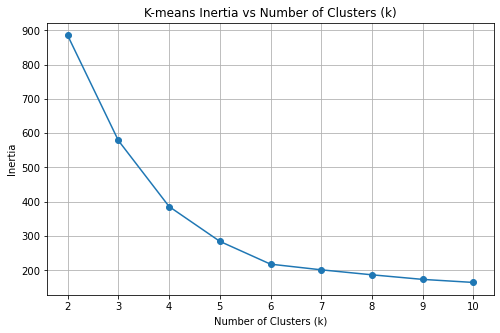

In [37]:
# Create a line plot.

import matplotlib.pyplot as plt

# k values from 2 to 10
k_values = list(range(2, 11))

# inertia values for k=2 to 10 (from previous step)
inertia_values = inertia_k2_to_10

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('K-means Inertia vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=inertia`.
</details>

**Question:** Where is the elbow in the plot?

[Write your response here. Double-click (or enter) to edit.]

## **Step 4: Results and evaluation** 

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters. 

Then, compare the silhouette score of each value of k, from 2 through 10. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [39]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_sil(num_clusters_list, x_vals):
    silhouette_scores = []
    for k in num_clusters_list:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(x_vals)
        score = silhouette_score(x_vals, cluster_labels)
        silhouette_scores.append(score)
    return silhouette_scores

# Example usage:
scores = kmeans_sil(range(2, 11), X_scaled)
print(scores)

[0.44398088353055243, 0.45101024097188364, 0.5080140996630784, 0.519998574860868, 0.5263224884981607, 0.47774022332151733, 0.42680523270292947, 0.35977478703657334, 0.3589883410610364]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the `kmeans_sil` function video.
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Use either seaborn or matplotlib to visualize this relationship. 

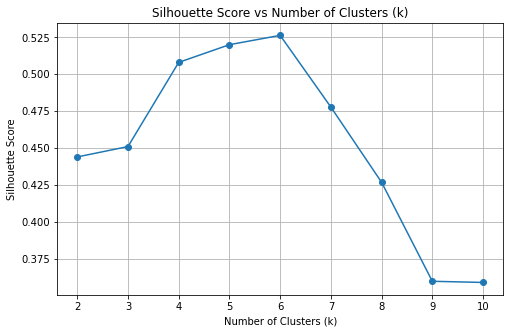

In [40]:
# Create a line plot.

import matplotlib.pyplot as plt

# Suppose you have the silhouette scores from kmeans_sil function
num_clusters = list(range(2, 11))
sil_scores = kmeans_sil(num_clusters, X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(num_clusters, sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=sil_score`.
</details>

**Question:** What does the graph show?

[Write your response here. Double-click (or enter) to edit.]

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset. 

In [41]:
from sklearn.cluster import KMeans

k = 6
kmeans_6 = KMeans(n_clusters=k, random_state=42)
kmeans_6.fit(X_scaled)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Make an instance of the model with `num_clusters = 6` and use the `fit` function on `X_scaled`. 
</details>




Print out the unique labels of the fit model.

In [44]:
# Print unique cluster labels assigned by the model

import numpy as np
print(np.unique(kmeans_6.labels_))


[0 1 2 3 4 5]


Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

**Note:** This task is done using `penguins_subset` because it is often easier to interpret unscaled data.

In [45]:
# Create a new column `cluster`.

penguins_subset['cluster'] = kmeans_6.labels_


Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [46]:
# Verify if any `cluster` can be differentiated by `species`.

cluster_species_counts = penguins_subset.groupby(['cluster', 'species']).size().unstack(fill_value=0)
print(cluster_species_counts)



species  Adelie  Chinstrap  Gentoo
cluster                           
0            71          0       0
1             0          0      58
2            73          5       0
3             0          0      61
4             2         34       0
5             0         29       0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster', 'species'])`. 

</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>


Use an aggregation function such as `size`.

</details>

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 

**Note:** The code for the graph below is outside the scope of this lab. 

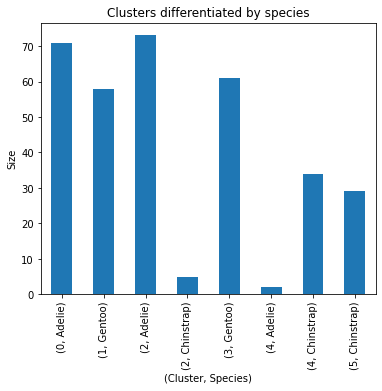

In [47]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [50]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.

cluster_species_sex_counts = penguins_subset.groupby(['cluster', 'species', 'sex']).size().unstack(fill_value=0)
print(cluster_species_sex_counts)



sex                 0   1
cluster species          
0       Adelie      0  71
1       Gentoo     58   0
2       Adelie     73   0
        Chinstrap   5   0
3       Gentoo      0  61
4       Adelie      0   2
        Chinstrap   0  34
5       Chinstrap  29   0


In [49]:
print(penguins_subset['sex'].unique())


[1 0]


In [57]:
penguins_subset_gender = pd.get_dummies(penguins_subset, columns=['sex'], drop_first=False)
penguins_subset_gender.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,sex_0,sex_1
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,2,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1


In [59]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.

cluster_species_sex_counts = penguins_subset_gender.groupby(['cluster', 'species', 'sex_1']).size().unstack(fill_value=0)
print(cluster_species_sex_counts)



sex_1               0   1
cluster species          
0       Adelie      0  71
1       Gentoo     58   0
2       Adelie     73   0
        Chinstrap   5   0
3       Gentoo      0  61
4       Adelie      0   2
        Chinstrap   0  34
5       Chinstrap  29   0


In [62]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.

cluster_species_sex_counts = penguins_subset_gender.groupby(['cluster', 'species', 'sex_0']).size().unstack(fill_value=0)
print(cluster_species_sex_counts)



sex_0               0   1
cluster species          
0       Adelie     71   0
1       Gentoo      0  58
2       Adelie      0  73
        Chinstrap   0   5
3       Gentoo     61   0
4       Adelie      2   0
        Chinstrap  34   0
5       Chinstrap   0  29


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster','species', 'sex_MALE'])`. 
</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use an aggregation function such as `size`.
</details>

**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

[Write your response here. Double-click (or enter) to edit.]

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

**Note:** The code for the graph below is outside the scope of this lab. 

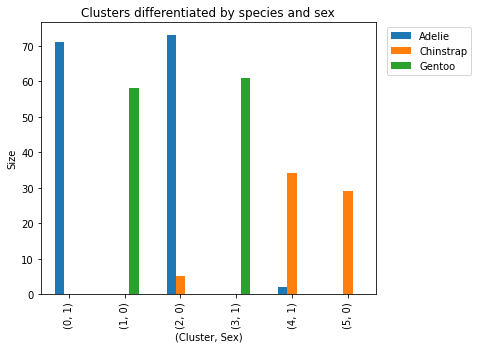

In [61]:
penguins_subset_gender.groupby(by=['cluster','species','sex_1']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**


**What are some key takeaways that you learned during this lab? Consider the process you used, key tools, and the results of your investigation.**

[Write your response here. Double-click (or enter) to edit.]


**What summary would you provide to stakeholders?**

[Write your response here. Double-click (or enter) to edit.]



